# Secção 1 - Descrição e caracterização dos dados do dataset

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

## Data

In [2]:
data_glioma = pd.read_csv("data_RNA_Seq_v2_expression_median.txt", sep='\t', index_col = 0)

In [3]:
data_glioma.head()

,Entrez_Gene_Id,TCGA-CS-4938-01,TCGA-CS-4941-01,TCGA-CS-4942-01,TCGA-CS-4943-01,TCGA-CS-4944-01,TCGA-CS-5390-01,TCGA-CS-5393-01,TCGA-CS-5394-01,TCGA-CS-5395-01,...,TCGA-VW-A8FI-01,TCGA-W9-A837-01,TCGA-WH-A86K-01,TCGA-WY-A858-01,TCGA-WY-A859-01,TCGA-WY-A85A-01,TCGA-WY-A85B-01,TCGA-WY-A85C-01,TCGA-WY-A85D-01,TCGA-WY-A85E-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
LOC100130426,100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
UBE2Q2P3,100133144,8.7141,36.4493,11.8131,8.6116,0.0000,5.3382,3.7845,8.3071,2.7732,...,19.1299,12.5770,10.9796,7.8225,3.3371,5.4526,8.2616,11.5121,5.3895,9.9433
UBE2Q2P3,100134869,22.7523,21.1767,11.0242,5.0835,30.2610,27.8886,8.7230,15.4466,12.7776,...,21.9905,27.0125,14.2608,16.6975,10.2310,16.1890,19.7074,18.7291,8.9103,7.4480
LOC149767,10357,268.5756,156.6874,185.1384,269.8363,216.3409,159.7590,198.1884,208.5413,255.2882,...,127.7473,106.8292,205.5168,184.4077,125.5468,124.9195,133.7392,120.9236,107.2535,143.0057
TIMM23,10431,845.8150,390.2692,621.4533,835.7286,812.5079,576.9055,551.9467,607.8956,386.1776,...,564.3623,603.3724,570.9135,760.7155,875.1413,658.2212,662.6506,524.7242,705.1282,748.5822


In [4]:
# Tamanho da amostra

# Delete da coluna Entrez_Gene_ID pois o que se quer considerar são a quantidade de genes e de amostras
del data_glioma["Entrez_Gene_Id"]

data_glioma.shape

(20531, 530)

Tem-se 20531 genes (catalogados por "Hugo_Symbol") e 530 amostras.

In [5]:
#Tipos de dados
print ([data_glioma.iloc[:,i].dtype for i in range(data_glioma.shape[1])])

[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('fl

In [6]:
# Certificar que não existem genes repetidos

hugo_data_glioma = data_glioma.reset_index()
hugo_data_glioma.drop_duplicates(subset=['Hugo_Symbol'],keep=False)

new_data_glioma = hugo_data_glioma.set_index('Hugo_Symbol')
new_data_glioma.head()

,TCGA-CS-4938-01,TCGA-CS-4941-01,TCGA-CS-4942-01,TCGA-CS-4943-01,TCGA-CS-4944-01,TCGA-CS-5390-01,TCGA-CS-5393-01,TCGA-CS-5394-01,TCGA-CS-5395-01,TCGA-CS-5396-01,...,TCGA-VW-A8FI-01,TCGA-W9-A837-01,TCGA-WH-A86K-01,TCGA-WY-A858-01,TCGA-WY-A859-01,TCGA-WY-A85A-01,TCGA-WY-A85B-01,TCGA-WY-A85C-01,TCGA-WY-A85D-01,TCGA-WY-A85E-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
LOC100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
UBE2Q2P3,8.7141,36.4493,11.8131,8.6116,0.0000,5.3382,3.7845,8.3071,2.7732,8.2828,...,19.1299,12.5770,10.9796,7.8225,3.3371,5.4526,8.2616,11.5121,5.3895,9.9433
UBE2Q2P3,22.7523,21.1767,11.0242,5.0835,30.2610,27.8886,8.7230,15.4466,12.7776,19.9402,...,21.9905,27.0125,14.2608,16.6975,10.2310,16.1890,19.7074,18.7291,8.9103,7.4480
LOC149767,268.5756,156.6874,185.1384,269.8363,216.3409,159.7590,198.1884,208.5413,255.2882,129.7185,...,127.7473,106.8292,205.5168,184.4077,125.5468,124.9195,133.7392,120.9236,107.2535,143.0057
TIMM23,845.8150,390.2692,621.4533,835.7286,812.5079,576.9055,551.9467,607.8956,386.1776,645.7550,...,564.3623,603.3724,570.9135,760.7155,875.1413,658.2212,662.6506,524.7242,705.1282,748.5822


In [7]:
# Verificar se existem valores em falta
print(new_data_glioma.isnull().sum().sum()) #total
print(new_data_glioma.isnull().sum())       #para cada amostra

0
TCGA-CS-4938-01    0
TCGA-CS-4941-01    0
TCGA-CS-4942-01    0
TCGA-CS-4943-01    0
TCGA-CS-4944-01    0
                  ..
TCGA-WY-A85A-01    0
TCGA-WY-A85B-01    0
TCGA-WY-A85C-01    0
TCGA-WY-A85D-01    0
TCGA-WY-A85E-01    0
Length: 530, dtype: int64


## Metadata 

In [8]:
patient_data = pd.read_csv("data_bcr_clinical_data_patient.txt", sep='\t', index_col = 1)
sample_data  = pd.read_csv("data_bcr_clinical_data_sample.txt", sep='\t', index_col = 1) 

In [9]:
# Informação a retirar do ficheito patiente_data
patient_data.columns = patient_data.iloc[3].values    
patient_data         = patient_data.iloc[4:]

patient_data.head()

,OTHER_PATIENT_ID,FORM_COMPLETION_DATE,HISTOLOGICAL_DIAGNOSIS,GRADE,LATERALITY,TUMOR_SITE,SUPRATENTORIAL_LOCALIZATION,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,SEX,...,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,PROJECT_CODE,TARGETED_MOLECULAR_THERAPY,TISSUE_SOURCE_SITE,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
Patient Identifier,,,,,,,,,,,,,,,,,,,,,
TCGA-CS-4938,334f715e-08dc-4a29-b8e4-b010b829c478,2/15/12,Astrocytoma,G2,Right,"Supratentorial, Frontal Lobe",Cerebral Cortex,NO,YES,Female,...,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,LIVING,117.41,DiseaseFree,117.41
TCGA-CS-4941,fc222f23-b3b2-4ac0-bc61-e8e8fa5cc160,4/5/11,Astrocytoma,G3,Right,"Supratentorial, Frontal Lobe",Cerebral Cortex,NO,YES,Male,...,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,DECEASED,7.69,Recurred/Progressed,0.3
TCGA-CS-4942,230f5fa7-aa36-41ea-b40b-08f520767bd5,3/15/11,Astrocytoma,G3,Right,"Supratentorial, Frontal Lobe",White Matter,NO,YES,Female,...,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,DECEASED,43.86,Recurred/Progressed,38.9
TCGA-CS-4943,952dfd5d-e65a-4307-b6a9-2ed2b0d2d9ce,3/16/11,Astrocytoma,G3,Left,"Supratentorial, Frontal Lobe",Cerebral Cortex,NO,YES,Male,...,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,DECEASED,36.33,[Not Available],[Not Available]
TCGA-CS-4944,64cd17eb-c778-45e9-b994-02b68182e51b,4/6/11,Astrocytoma,G2,Right,"Supratentorial, Temporal Lobe",Cerebral Cortex,NO,YES,Male,...,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,LIVING,60.05,DiseaseFree,60.05


In [10]:
patient_data.describe()

,OTHER_PATIENT_ID,FORM_COMPLETION_DATE,HISTOLOGICAL_DIAGNOSIS,GRADE,LATERALITY,TUMOR_SITE,SUPRATENTORIAL_LOCALIZATION,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,SEX,...,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,PROJECT_CODE,TARGETED_MOLECULAR_THERAPY,TISSUE_SOURCE_SITE,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
count,515,515,515,515,515,515,515,515,515,515,...,515,515,515,515,515,515,515,515,515,515
unique,515,171,3,3,4,8,5,3,3,2,...,6,1,1,3,26,1,2,434,3,404
top,CF29547A-305B-4E6E-8342-36AAC0850065,11/13/14,Astrocytoma,G3,Right,"Supratentorial, Frontal Lobe",Not listed in Medical Record,NO,YES,Male,...,C71.0,YES,[Not Available],[Not Available],HT,Central nervous system,LIVING,0.1,DiseaseFree,[Not Available]
freq,1,14,194,265,253,302,222,331,330,285,...,439,515,515,251,104,515,389,9,313,37


In [11]:
# Tamanho da amostra
patient_data.shape

(515, 67)

Existem 515 pacientes. A cada paciente está associado um conjunto de 67 variáveis, como por exemplo, o sexo, o diagnóstico, o grau da doença, o estado da doença desde o seu aparecimento, entre outras.

In [12]:
# Valores em falta
print (patient_data[patient_data =='[Not Available]'].count().sum())   # Total
print (patient_data[patient_data =='[Not Available]'].count())         # Para cada variável em estudo

9148
OTHER_PATIENT_ID           0
FORM_COMPLETION_DATE       0
HISTOLOGICAL_DIAGNOSIS     0
GRADE                      0
LATERALITY                 5
                          ..
SITE_OF_TUMOR_TISSUE       0
OS_STATUS                  0
OS_MONTHS                  1
DFS_STATUS                37
DFS_MONTHS                37
Length: 67, dtype: int64


In [13]:
# Informação a retirar do ficheito sample_data
sample_data.columns  = sample_data.iloc[3].values
sample_data          = sample_data.iloc[4:]

sample_data.head()

,PATIENT_ID,OTHER_SAMPLE_ID,SPECIMEN_CURRENT_WEIGHT,DAYS_TO_COLLECTION,DAYS_TO_SPECIMEN_COLLECTION,SPECIMEN_FREEZING_METHOD,SAMPLE_INITIAL_WEIGHT,SPECIMEN_SECOND_LONGEST_DIMENSION,IS_FFPE,LONGEST_DIMENSION,...,PATHOLOGY_REPORT_UUID,SAMPLE_TYPE,SAMPLE_TYPE_ID,SHORTEST_DIMENSION,TIME_BETWEEN_CLAMPING_AND_FREEZING,TIME_BETWEEN_EXCISION_AND_FREEZING,VIAL_NUMBER,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED
Sample Identifier,,,,,,,,,,,,,,,,,,,,,
TCGA-CS-6290-01,TCGA-CS-6290,6148f31e-cdba-481b-bcd7-b3aee05925b1,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.4,NO,0.4,...,4d5bdf18-7799-463d-a33a-beb8322b0621,Primary,1,0.4,[Not Available],[Not Available],A,AASTR,Glioma,Anaplastic Astrocytoma
TCGA-DU-5847-01,TCGA-DU-5847,c68fc12c-c538-4a89-9f6e-c0800a5a6b53,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.8,NO,1,...,d9f2d994-5d17-46c6-a6c9-0f25703ffb22,Primary,1,0.4,[Not Available],[Not Available],A,AASTR,Glioma,Anaplastic Astrocytoma
TCGA-DU-5849-01,TCGA-DU-5849,9e0e239f-ced4-4cf3-bf3c-5ec8224d760b,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,0.9,...,7ec64754-8800-44dd-a5cc-2a9e8fc8bb27,Primary,1,0.4,[Not Available],[Not Available],A,ODG,Glioma,Oligodendroglioma
TCGA-DU-5852-01,TCGA-DU-5852,101aaa90-fe0a-42b7-bcc7-4f44e29883ec,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,1,...,a6c1f30a-8350-4fbc-9af2-5333cbe273e6,Primary,1,0.9,[Not Available],[Not Available],A,OAST,Glioma,Oligoastrocytoma
TCGA-DU-5854-01,TCGA-DU-5854,d5baa53a-958c-4163-a388-d3c957c891f9,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,1,...,e057679f-9741-4a4e-bb60-e03879b1c723,Primary,1,0.7,[Not Available],[Not Available],A,AASTR,Glioma,Anaplastic Astrocytoma


In [14]:
sample_data.describe()

,PATIENT_ID,OTHER_SAMPLE_ID,SPECIMEN_CURRENT_WEIGHT,DAYS_TO_COLLECTION,DAYS_TO_SPECIMEN_COLLECTION,SPECIMEN_FREEZING_METHOD,SAMPLE_INITIAL_WEIGHT,SPECIMEN_SECOND_LONGEST_DIMENSION,IS_FFPE,LONGEST_DIMENSION,...,PATHOLOGY_REPORT_UUID,SAMPLE_TYPE,SAMPLE_TYPE_ID,SHORTEST_DIMENSION,TIME_BETWEEN_CLAMPING_AND_FREEZING,TIME_BETWEEN_EXCISION_AND_FREEZING,VIAL_NUMBER,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED
count,530,530,530,530,530,530,530,530,530,530,...,530,530,530,530,530,530,530,530,530,530
unique,516,530,1,267,1,1,61,16,1,29,...,525,2,2,11,1,1,2,6,1,6
top,TCGA-TQ-A7RV,40592b11-f9a7-4224-8ac2-1e3528660f4e,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],NO,[Not Available],...,5A7D5219-AFF1-4DC0-9A8B-F6403D021501,Primary,1,[Not Available],[Not Available],[Not Available],A,OAST,Glioma,Oligoastrocytoma
freq,2,1,530,223,530,530,223,308,530,308,...,2,516,516,308,530,530,519,134,530,134


In [15]:
# Tamanho da amostra
sample_data.shape

(530, 24)

Foram recolhidas 530 amostras. Para cada amostra estão associadas um máximo de 24 variáveis, como por exemplo, o tipo de cancro detalhado. Uma vez que existem 530 amostras para 515 pacientes, poderão exisitr pacientes com mais que uma amostra.

In [16]:
# Valores em falta
print ('Total:', sample_data[sample_data =='[Not Available]'].count().sum())                 #Total
print ('Para cada variável:\n',sample_data[sample_data =='[Not Available]'].count() )        #Para cada variável em estudo

Total: 5305
Para cada variável:
 PATIENT_ID                              0
OTHER_SAMPLE_ID                         0
SPECIMEN_CURRENT_WEIGHT               530
DAYS_TO_COLLECTION                    223
DAYS_TO_SPECIMEN_COLLECTION           530
SPECIMEN_FREEZING_METHOD              530
SAMPLE_INITIAL_WEIGHT                 223
SPECIMEN_SECOND_LONGEST_DIMENSION     308
IS_FFPE                                 0
LONGEST_DIMENSION                     308
METHOD_OF_SAMPLE_PROCUREMENT          530
OCT_EMBEDDED                          222
OTHER_METHOD_OF_SAMPLE_PROCUREMENT    530
PATHOLOGY_REPORT_FILE_NAME              3
PATHOLOGY_REPORT_UUID                   0
SAMPLE_TYPE                             0
SAMPLE_TYPE_ID                          0
SHORTEST_DIMENSION                    308
TIME_BETWEEN_CLAMPING_AND_FREEZING    530
TIME_BETWEEN_EXCISION_AND_FREEZING    530
VIAL_NUMBER                             0
ONCOTREE_CODE                           0
CANCER_TYPE                             0
C

In [17]:
# Número de linhas (amostras) do sample_data corresponde ao número de colunas (amostras) do data_glioma
(sample_data.index.sort_values() == new_data_glioma.columns.sort_values()).sum()

530

### União de dataframes

In [18]:
# Ordenar as amostras em sample_data 
sample_data["PATIENT_ID"].sort_values()

Sample Identifier
TCGA-CS-4938-01    TCGA-CS-4938
TCGA-CS-4941-01    TCGA-CS-4941
TCGA-CS-4942-01    TCGA-CS-4942
TCGA-CS-4943-01    TCGA-CS-4943
TCGA-CS-4944-01    TCGA-CS-4944
                       ...     
TCGA-WY-A85A-01    TCGA-WY-A85A
TCGA-WY-A85B-01    TCGA-WY-A85B
TCGA-WY-A85C-01    TCGA-WY-A85C
TCGA-WY-A85D-01    TCGA-WY-A85D
TCGA-WY-A85E-01    TCGA-WY-A85E
Name: PATIENT_ID, Length: 530, dtype: object

In [19]:
# Ordenar as amostras em patient_data 
patient_data.index.sort_values()

Index(['TCGA-CS-4938', 'TCGA-CS-4941', 'TCGA-CS-4942', 'TCGA-CS-4943',
       'TCGA-CS-4944', 'TCGA-CS-5390', 'TCGA-CS-5393', 'TCGA-CS-5394',
       'TCGA-CS-5395', 'TCGA-CS-5396',
       ...
       'TCGA-VW-A8FI', 'TCGA-W9-A837', 'TCGA-WH-A86K', 'TCGA-WY-A858',
       'TCGA-WY-A859', 'TCGA-WY-A85A', 'TCGA-WY-A85B', 'TCGA-WY-A85C',
       'TCGA-WY-A85D', 'TCGA-WY-A85E'],
      dtype='object', name='Patient Identifier', length=515)

Estas últimas duas linhas de código são importantes para garantir que a junção dos dataframes seja feita de forma coerente. Ou seja, cada linha dos metadados deve correponder a uma só amostra.

In [20]:
#Unir os dataframes
unified_meta = sample_data.join(patient_data, on = "PATIENT_ID")

In [21]:
unified_meta.head()

,PATIENT_ID,OTHER_SAMPLE_ID,SPECIMEN_CURRENT_WEIGHT,DAYS_TO_COLLECTION,DAYS_TO_SPECIMEN_COLLECTION,SPECIMEN_FREEZING_METHOD,SAMPLE_INITIAL_WEIGHT,SPECIMEN_SECOND_LONGEST_DIMENSION,IS_FFPE,LONGEST_DIMENSION,...,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,PROJECT_CODE,TARGETED_MOLECULAR_THERAPY,TISSUE_SOURCE_SITE,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
Sample Identifier,,,,,,,,,,,,,,,,,,,,,
TCGA-CS-6290-01,TCGA-CS-6290,6148f31e-cdba-481b-bcd7-b3aee05925b1,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.4,NO,0.4,...,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,DECEASED,37.35,[Not Available],[Not Available]
TCGA-DU-5847-01,TCGA-DU-5847,c68fc12c-c538-4a89-9f6e-c0800a5a6b53,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.8,NO,1,...,C71.9,YES,[Not Available],[Not Available],DU,Central nervous system,LIVING,18,DiseaseFree,18
TCGA-DU-5849-01,TCGA-DU-5849,9e0e239f-ced4-4cf3-bf3c-5ec8224d760b,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,0.9,...,C71.9,YES,[Not Available],[Not Available],DU,Central nervous system,LIVING,14.55,DiseaseFree,14.55
TCGA-DU-5852-01,TCGA-DU-5852,101aaa90-fe0a-42b7-bcc7-4f44e29883ec,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,1,...,C71.9,YES,[Not Available],[Not Available],DU,Central nervous system,DECEASED,6.73,Recurred/Progressed,0.79
TCGA-DU-5854-01,TCGA-DU-5854,d5baa53a-958c-4163-a388-d3c957c891f9,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,1,...,C71.9,YES,[Not Available],[Not Available],DU,Central nervous system,LIVING,8.44,Recurred/Progressed,6.64


In [22]:
del unified_meta['PATIENT_ID']
unified_meta.shape

(530, 90)

Tem-se 530 amostras e 90 variáveis.

## Escolha das variáveis para análise 

In [23]:
# Certificar que não existem pacientes repetidos

id_unified_meta = unified_meta.reset_index()
id_unified_meta.drop_duplicates(subset=['Sample Identifier'],keep='first') #Drop duplicates except for the first occurrence
new_unified_meta = id_unified_meta.set_index('Sample Identifier')
new_unified_meta.head()

,OTHER_SAMPLE_ID,SPECIMEN_CURRENT_WEIGHT,DAYS_TO_COLLECTION,DAYS_TO_SPECIMEN_COLLECTION,SPECIMEN_FREEZING_METHOD,SAMPLE_INITIAL_WEIGHT,SPECIMEN_SECOND_LONGEST_DIMENSION,IS_FFPE,LONGEST_DIMENSION,METHOD_OF_SAMPLE_PROCUREMENT,...,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,PROJECT_CODE,TARGETED_MOLECULAR_THERAPY,TISSUE_SOURCE_SITE,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
Sample Identifier,,,,,,,,,,,,,,,,,,,,,
TCGA-CS-6290-01,6148f31e-cdba-481b-bcd7-b3aee05925b1,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.4,NO,0.4,[Not Available],...,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,DECEASED,37.35,[Not Available],[Not Available]
TCGA-DU-5847-01,c68fc12c-c538-4a89-9f6e-c0800a5a6b53,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.8,NO,1,[Not Available],...,C71.9,YES,[Not Available],[Not Available],DU,Central nervous system,LIVING,18,DiseaseFree,18
TCGA-DU-5849-01,9e0e239f-ced4-4cf3-bf3c-5ec8224d760b,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,0.9,[Not Available],...,C71.9,YES,[Not Available],[Not Available],DU,Central nervous system,LIVING,14.55,DiseaseFree,14.55
TCGA-DU-5852-01,101aaa90-fe0a-42b7-bcc7-4f44e29883ec,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,1,[Not Available],...,C71.9,YES,[Not Available],[Not Available],DU,Central nervous system,DECEASED,6.73,Recurred/Progressed,0.79
TCGA-DU-5854-01,d5baa53a-958c-4163-a388-d3c957c891f9,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,1,[Not Available],...,C71.9,YES,[Not Available],[Not Available],DU,Central nervous system,LIVING,8.44,Recurred/Progressed,6.64


In [89]:
new_unified_meta.shape

(530, 91)

Variáveis: 
Tipo de cancro detalhado;
Grau da doença;
Estado da doença desde o seu aparecimento.

In [25]:
## Contagem do número de amostras com um determinado tipo de cancro

new_unified_meta_cancer = new_unified_meta['CANCER_TYPE_DETAILED'].value_counts()
print(new_unified_meta_cancer)

Oligoastrocytoma               134
Anaplastic Astrocytoma         130
Oligodendroglioma              120
Anaplastic Oligoastrocytoma     78
Astrocytoma                     67
Diffuse Glioma                   1
Name: CANCER_TYPE_DETAILED, dtype: int64


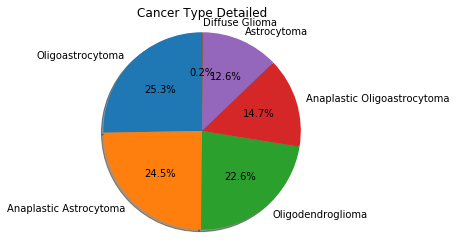

In [26]:
cancer_type = ['Oligoastrocytoma','Anaplastic Astrocytoma', 'Oligodendroglioma', 'Anaplastic Oligoastrocytoma', 'Astrocytoma', 'Diffuse Glioma']
occurrence  = [134, 130, 120, 78, 67, 1]

fig1, ax1 = plt.subplots()
ax1.pie(occurrence, labels=cancer_type, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Cancer Type Detailed')
plt.show()

Oligastrocytoma é o cancro com mais ocorrência no dataset analisado (25.3%).

In [27]:
#Contagem do número de amostras com um determinado grau de doença

new_unified_meta_cancer = new_unified_meta['GRADE'].value_counts()
print(new_unified_meta_cancer)

G3               270
G2               258
[Discrepancy]      1
Name: GRADE, dtype: int64


Existe uma amostra onde a informação sobre o grau não é conhecida e é dada como "Discrepancy".

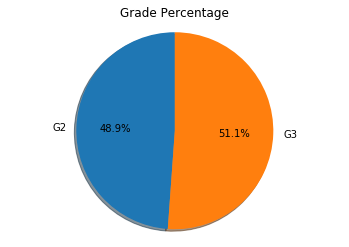

In [28]:
grade = ['G2','G3']
grade_people = [258,270]

fig1, ax1 = plt.subplots()
ax1.pie(grade_people, labels=grade, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Grade Percentage')
plt.show()

Nos dados fornecidos, existe um maior número de amostras cujo cancro se encontra em grau 3.

In [29]:
#Número de amostras com um determinado estado da doença desde o seu aparecimento

new_unified_meta_cancer = new_unified_meta['DFS_STATUS'].value_counts()
print(new_unified_meta_cancer)

DiseaseFree            313
Recurred/Progressed    179
[Not Available]         37
Name: DFS_STATUS, dtype: int64


Existem 37 amostras onde não é fornecido qualquer informação sobre o estado da doença.

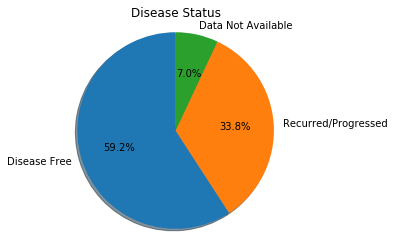

In [30]:
sickness_progression = ['Disease Free','Recurred/Progressed','Data Not Available']
sickness_number = [313,179,37]

fig1, ax1 = plt.subplots()
ax1.pie(sickness_number, labels=sickness_progression, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Disease Status')
plt.show()

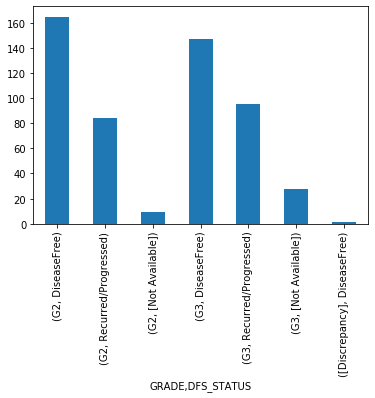

In [31]:
#Relação entre o número de amostras que apresentam um deteminado grau da doença e o estado desta desde o seu aparecimento.

new_unified_meta.groupby(['GRADE','DFS_STATUS']).size().plot.bar()

Através do gráfico de barras obtido, verifica-se que o estado "Disease Free" é superior para amostras que aparesentaram grau 2 da doença. Este grau está também associado a um menor número de casos em que o cancro progrediu ou reapareceu. No entanto, é importante realçar que esta comparação só estaria completa se fosse conhecido o grau e estado da doença desde o seu aparecimento para todas as amostras recolhidas.

## Secção 1 - Comentário

O dataset analisado apresenta 20531 genes para um total de 530 amostras. Estas amostras correspondem a 515 pacientes que possuem diversos tipos de gliomas cerebrais de baixo grau.

Através da união dos metadados, verificou-se que para cada uma das 530 amostras estão associadas 90 atributos/variáveis de estudo, como por exemplo, o sexo dos paciente, o local onde se encontra o tumor, o grau da doença, o estado de progressão, entre outras. No entanto, verificou-se que para muitas variavéis, não exisita qualquer informação. 

As variáveis consideradas mais relevantes para o dataset fornecido foram o tipo de glioma, o grau da doença e o estado dela aquando da recolha dos dados.

Pela análise realizada, verificou-se que o tipo de glioma mais ocorrente é o Oligastrocytoma. Existem mais amostras que, aquando da sua recolha, o cancro apresentava grau 3. Apesar de haver informação em falta, observou-se que existe um maior número de pacientes que já não apresentam a doença. Por fim, existe uma maior correlação com este estado da doença e com as amostras que apresentavam grau 2.

# Secção 2 - Técnicas de análise inferencial / estatísitca

PCA - Redução de dimensionalidade dos dados, construindo combinações lineares de expressões de genes; Determinação de quantos componentes principais são necessários para explicar 90% da variabilidade dos dados.

Cada PC é gerada de forma a explicar o máximo de variabilidade da parte ainda não explicada, tendo que ser ortogonal às PCs anteriores.

In [32]:
input_data = new_data_glioma
output_data = new_unified_meta.values[:,0]

input_sc = preprocessing.scale(input_data)
print("Media: ", input_sc.mean())
print("Desvio padrao: ", input_sc.std())

Media:  1.3562530496209856e-18
Desvio padrao:  1.0000000000000016


[9.82088911e+00 8.33711743e+00 7.85329821e+00 4.57784691e+00
 3.38131900e+00 2.82189852e+00 2.46820662e+00 1.95425580e+00
 1.78662427e+00 1.73062088e+00 1.41739521e+00 1.31937310e+00
 1.02493947e+00 1.00785075e+00 9.10116937e-01 8.62489236e-01
 7.81989179e-01 7.60048749e-01 6.92289806e-01 6.51612748e-01
 6.36421492e-01 5.91462277e-01 5.86988663e-01 5.50906133e-01
 5.33685404e-01 5.04769873e-01 4.57406279e-01 4.49601202e-01
 4.35602706e-01 4.21229007e-01 4.17403637e-01 4.02550531e-01
 3.91590353e-01 3.87417936e-01 3.77135872e-01 3.69382719e-01
 3.60608583e-01 3.56572134e-01 3.48200941e-01 3.46696933e-01
 3.41457022e-01 3.33518388e-01 3.32127729e-01 3.27979818e-01
 3.19271222e-01 3.12147119e-01 3.06294867e-01 3.00731475e-01
 2.93271914e-01 2.90604066e-01 2.85292742e-01 2.79246669e-01
 2.75783872e-01 2.73304384e-01 2.72273677e-01 2.69789508e-01
 2.59258091e-01 2.55220879e-01 2.50237817e-01 2.47083102e-01
 2.40041286e-01 2.35182828e-01 2.34200864e-01 2.29324015e-01
 2.27530638e-01 2.259460

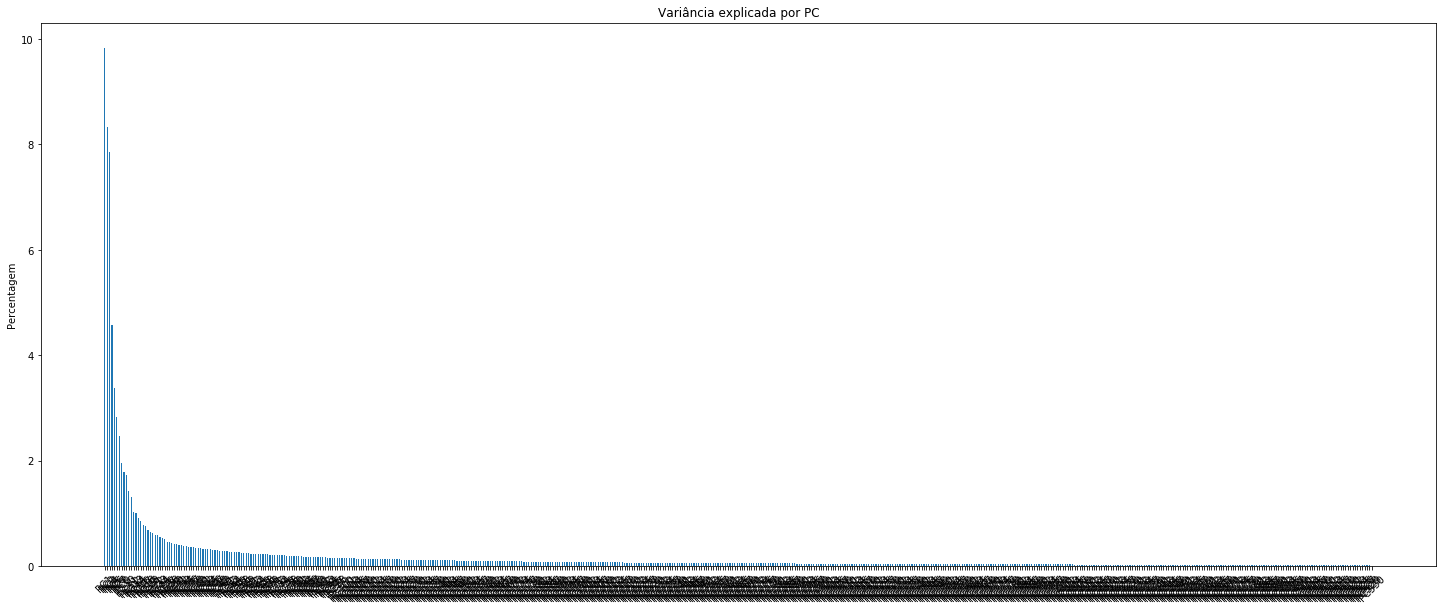

In [33]:
new_data   = new_data_glioma.transpose()           
data_scale = preprocessing.scale(new_data)
n          = 530                                                              #tem-se 530 samples                                                     
pca        = PCA(n_components = n) 
x_reduced  = pca.fit(data_scale).transform(data_scale)                                                                                                # escala

variance   = (pca.explained_variance_ratio_*100)
print(variance)

labels     = ["PC" + str(i) for i in range(1,len(variance) + 1)] 
plt.figure(figsize=(25, 10))
plt.bar([i*2 for i in range(1,len(variance) + 1)], height = variance, align="center", width=1)
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.xticks([i*2 for i in range(1,len(variance) + 1)], labels, rotation=45)
plt.show()

In [34]:
s = 0
for i in range(len(pca.explained_variance_ratio_)):
    s += pca.explained_variance_ratio_[i]
    if s >= 0.5:
        print(s,i)

0.5041175220646572 14
0.5127424144234111 15
0.5205623062097656 16
0.5281627937010915 17
0.535085691759831 18
0.54160181924056 19
0.5479660341572922 20
0.5538806569243876 21
0.559750543552272 22
0.5652596048865071 23
0.570596458928596 24
0.5756441576631963 25
0.5802182204498498 26
0.5847142324702993 27
0.5890702595272224 28
0.5932825495996921 29
0.5974565859685629 30
0.6014820912810468 31
0.605397994813963 32
0.6092721741778684 33
0.6130435329001811 34
0.6167373600864141 35
0.620343445919454 36
0.6239091672573385 37
0.6273911766713989 38
0.6308581460055863 39
0.6342727162237023 40
0.6376079001026498 41
0.6409291773893917 42
0.6442089755673979 43
0.6474016877857495 44
0.6505231589764878 45
0.6535861076496711 46
0.6565934223996511 47
0.6595261415437758 48
0.6624321822051429 49
0.6652851096239394 50
0.6680775763167532 51
0.6708354150355242 52
0.673568458872771 53
0.6762911956451824 54
0.6789890907253728 55
0.6815816716361696 56
0.6841338804249543 57
0.6866362585922385 58
0.6891070896150018

0.9964533493420491 506
0.9966330869979906 507
0.9968123192155869 508
0.9969880133736436 509
0.9971626521837477 510
0.9973347576037322 511
0.9975064952080019 512
0.9976762300375577 513
0.9978449424420403 514
0.9980119251692703 515
0.9981774537369239 516
0.998341204791247 517
0.9985028697352877 518
0.9986600739790173 519
0.9988158704237542 520
0.9989713884904065 521
0.9991252928211548 522
0.9992773718986001 523
0.9994282701215682 524
0.9995755547038861 525
0.9997213846888129 526
0.9998632994407629 527
1.0000000000000004 528
1.0000000000000004 529


Através da análise da variância explicada por PC (Componentes Principais), verifica-se que são necessários 240 componentes principais para exeplicar 90% de variabilidade dos dados.

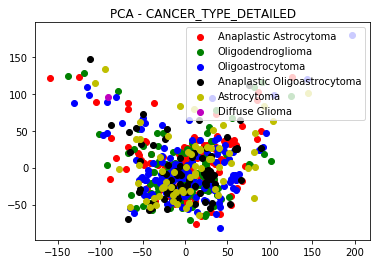

In [35]:
#Representação dos scores através de um plot scatter

for class_name in ['CANCER_TYPE_DETAILED']:
    output_data = new_unified_meta[class_name].values
    plt.figure()
    for c, name in zip("rgbkym", new_unified_meta[class_name].unique()):
        plt.scatter(x_reduced[output_data == name, 0], x_reduced[output_data == name, 1], c=c, label=name)
    plt.legend()
    plt.title('PCA - '+ class_name)
    plt.show()

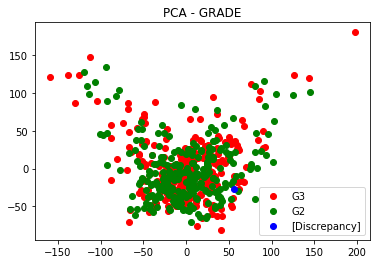

In [36]:
for class_name in ['GRADE']:
    output_data = new_unified_meta[class_name].values
    plt.figure()
    for c, name in zip("rgb", new_unified_meta[class_name].unique()):
        plt.scatter(x_reduced[output_data == name, 0], x_reduced[output_data == name, 1], c=c, label=name)
    plt.legend()
    plt.title('PCA - '+ class_name)
    plt.show()

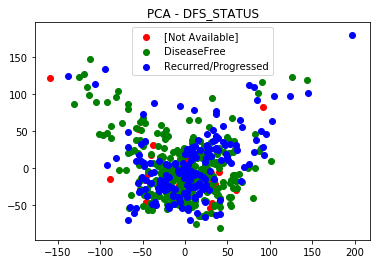

In [37]:
for class_name in ['DFS_STATUS']:
    output_data = new_unified_meta[class_name].values
    plt.figure()
    for c, name in zip("rgb", new_unified_meta[class_name].unique()):
        plt.scatter(x_reduced[output_data == name, 0], x_reduced[output_data == name, 1], c=c, label=name)
    plt.legend()
    plt.title('PCA - '+ class_name)
    plt.show()

Clustering hierarquico dos dados. Agrupamento dos genes, iteração a iteração.

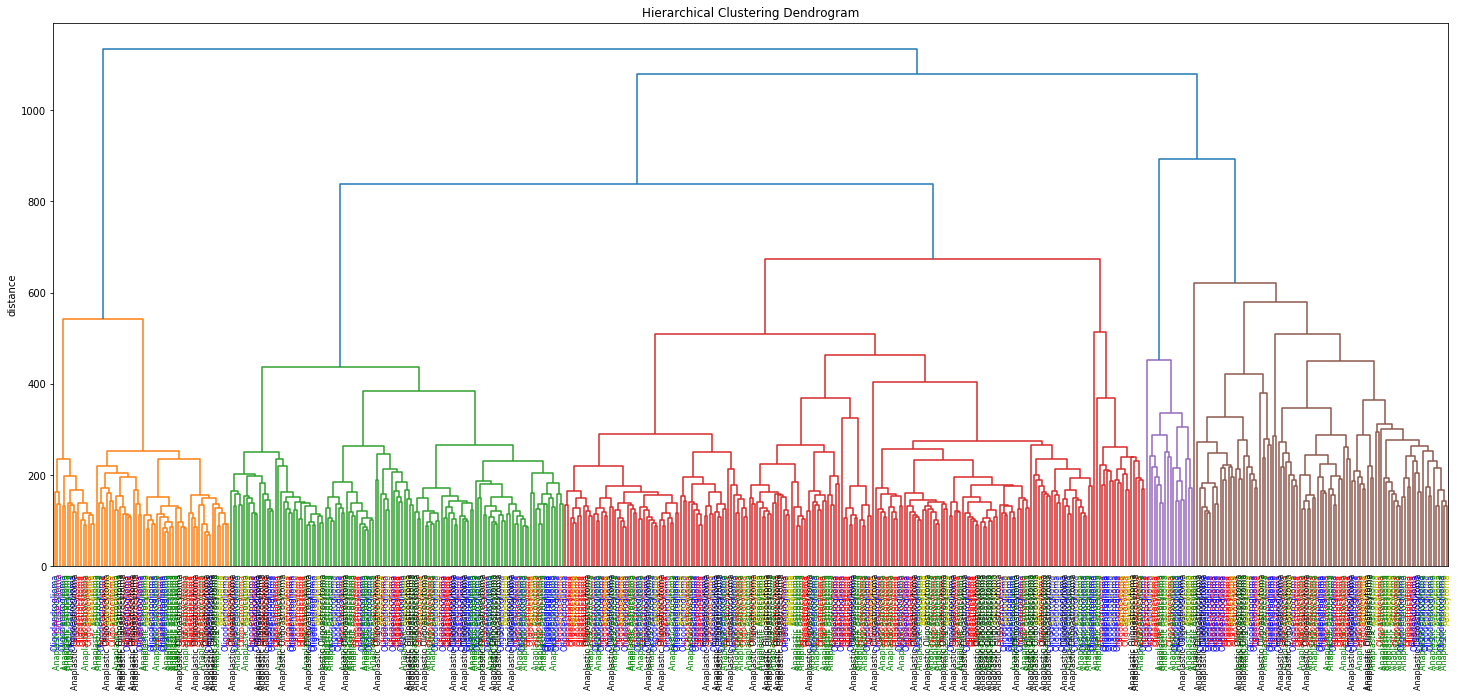

In [50]:
Z = linkage(data_scale, method='ward', metric='euclidean')
new_unified_meta['labels'] = new_unified_meta['CANCER_TYPE_DETAILED']
# calculate full dendrogram
plt.figure(figsize = (25, 10))
dendrogram(
    Z,
    labels=list(new_unified_meta['labels']),
    leaf_rotation  = 90.,  # rotates the x axis labels
    leaf_font_size = 8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

# Assignment of colors to labels: 'r' is red, 'g' is green, etc.
label_colors = {'Oligoastrocytoma': 'r',              
                'Anaplastic Astrocytoma': 'g',         
                'Oligodendroglioma': 'b',            
                'Anaplastic Oligoastrocytoma': 'k',    
                'Astrocytoma': 'y',                     
                'Diffuse Glioma': 'm',
               }
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])
plt.show()

Determinação de K clusters que englobam todos os pontos, de forma a minimizar a média do quadrado das distâncias de cada ponto para o centro do cluster a que pertence

In [45]:
k=3
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_scale)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, new_unified_meta['GRADE'], rownames=['clusters'] )

GRADE,G2,G3,[Discrepancy]
clusters,,,
0,60,60,1
1,170,178,0
2,28,32,0


Os dados são mais arupados no cluster = 1.

In [40]:
pd.crosstab(labels, new_unified_meta['DFS_STATUS'], rownames=['clusters'] )

DFS_STATUS,DiseaseFree,Recurred/Progressed,[Not Available]
clusters,,,
0,70,50,6
1,202,115,27
2,41,14,4


Os dados são mais arupados no cluster = 1.

In [41]:
k=6 #identificados 6 tipos de cancros, logo k >= 6
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_scale)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
pd.crosstab(labels, new_unified_meta['CANCER_TYPE_DETAILED'], rownames=['clusters'] )

CANCER_TYPE_DETAILED,Anaplastic Astrocytoma,Anaplastic Oligoastrocytoma,Astrocytoma,Diffuse Glioma,Oligoastrocytoma,Oligodendroglioma
clusters,,,,,,
0,25,13,14,0,18,16
1,3,1,3,0,3,4
2,15,10,7,1,13,11
3,35,27,17,0,44,42
4,21,7,11,0,23,15
5,31,20,15,0,33,32


Os dados são mais arupados no cluster = 3.

## Secção 2 - Comentário

Pela análise da variância explicada por Componentes Principais, observou-se que são necessários 240 componentes principais para exeplicar 90% de variabilidade dos dados. Através dos score plots para as diferentes variáveis escolhidas, averiguou-se que as diferentes classes encontradas em cada variável não apresentam elevada distinção entre elas. Adicionalmente, efetuou-se um clustering k-means, para processar os dados de aprendizagem, agrupando-os de acordo com a sua proximidade a um centróide.

# Secção 3 - Aprendizagem de máquina

Quer-se extrair relações que permitam prever o valor de variáveis de saída a partir do valor de variáveis de entrada. Estas variáveis de entrada podem ser o grau da doença, o tipo de cancro diagnosticado, etc.

### Modelo K - Vizinhos

In [92]:
indices = np.random.permutation(len(input_data))
indices

input_data = data_scale
output_data_type = new_unified_meta['CANCER_TYPE_DETAILED'].values

train_in  = input_sc[indices[:]]
train_out = output_data_type[indices[:]]
test_in   = input_sc[indices[:]]
test_out  = output_data_type[indices[:]]

knn = KNeighborsClassifier()
knn.fit(train_in, train_out)
preds_knn = knn.predict(test_in)
print("Valores previstos: ", preds_knn)
print("Valores reais: " , test_out)

Valores previstos:  ['Oligodendroglioma' 'Anaplastic Astrocytoma' 'Astrocytoma'
 'Oligoastrocytoma' 'Anaplastic Astrocytoma' 'Anaplastic Astrocytoma'
 'Oligoastrocytoma' 'Anaplastic Astrocytoma' 'Oligoastrocytoma'
 'Oligoastrocytoma' 'Oligoastrocytoma' 'Oligodendroglioma'
 'Anaplastic Oligoastrocytoma' 'Anaplastic Astrocytoma'
 'Anaplastic Astrocytoma' 'Oligodendroglioma' 'Astrocytoma'
 'Anaplastic Astrocytoma' 'Oligoastrocytoma' 'Anaplastic Oligoastrocytoma'
 'Anaplastic Oligoastrocytoma' 'Anaplastic Oligoastrocytoma'
 'Oligoastrocytoma' 'Anaplastic Astrocytoma' 'Astrocytoma'
 'Oligoastrocytoma' 'Oligodendroglioma' 'Anaplastic Astrocytoma'
 'Oligodendroglioma' 'Oligoastrocytoma' 'Oligodendroglioma'
 'Oligoastrocytoma' 'Anaplastic Astrocytoma' 'Oligoastrocytoma'
 'Anaplastic Astrocytoma' 'Anaplastic Oligoastrocytoma'
 'Anaplastic Astrocytoma' 'Oligodendroglioma' 'Anaplastic Astrocytoma'
 'Anaplastic Astrocytoma' 'Anaplastic Oligoastrocytoma' 'Oligoastrocytoma'
 'Oligoastrocytoma' 'Anap

In [93]:
#Eficácia do Teste

print(preds_knn == test_out)
sum(preds_knn == test_out) / len(preds_knn)

[False  True False  True  True False False  True False False  True False
  True False False  True False False  True  True  True False False  True
 False  True  True False False  True  True False False  True False  True
 False False False  True  True  True  True  True False False  True False
  True  True False False False False False  True False  True  True False
  True False False  True  True False  True  True  True False  True False
 False  True  True False  True  True False  True False False  True False
  True  True  True False False  True False False  True False  True  True
 False False  True False False False  True  True  True  True False False
 False  True False  True False False False False False  True  True False
 False  True False False  True  True  True  True False  True False False
  True False  True False  True  True  True False  True False False False
  True False  True  True  True False  True  True False  True False  True
 False False  True False  True  True  True False  T

0.5

In [94]:
accuracy_score(preds_knn, test_out)

0.5

In [95]:
knn.score(test_in, test_out)

0.5

### Árvore de Decisão

In [96]:
#Permite classificar novos exemplos tendo em conta o valor dos atributos de entrada

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in, train_out)
preds_tree = tree_model.predict(test_in)

print("Valores previstos: ", preds_tree)
print("Valores reais: " , test_out)
print('')
print('Eficácia do teste')
print(preds_tree  == test_out)
sum(preds_tree  == test_out) / len(preds_tree)

Valores previstos:  ['Anaplastic Astrocytoma' 'Anaplastic Astrocytoma'
 'Anaplastic Astrocytoma' 'Oligoastrocytoma' 'Anaplastic Astrocytoma'
 'Anaplastic Oligoastrocytoma' 'Oligodendroglioma'
 'Anaplastic Astrocytoma' 'Anaplastic Astrocytoma' 'Oligodendroglioma'
 'Oligoastrocytoma' 'Astrocytoma' 'Anaplastic Oligoastrocytoma'
 'Anaplastic Oligoastrocytoma' 'Anaplastic Oligoastrocytoma'
 'Oligodendroglioma' 'Anaplastic Astrocytoma'
 'Anaplastic Oligoastrocytoma' 'Oligoastrocytoma'
 'Anaplastic Oligoastrocytoma' 'Anaplastic Oligoastrocytoma'
 'Anaplastic Astrocytoma' 'Anaplastic Astrocytoma'
 'Anaplastic Astrocytoma' 'Anaplastic Astrocytoma' 'Oligoastrocytoma'
 'Oligodendroglioma' 'Oligoastrocytoma' 'Astrocytoma' 'Oligoastrocytoma'
 'Oligodendroglioma' 'Astrocytoma' 'Astrocytoma' 'Oligoastrocytoma'
 'Oligodendroglioma' 'Anaplastic Oligoastrocytoma' 'Oligodendroglioma'
 'Anaplastic Oligoastrocytoma' 'Oligoastrocytoma' 'Anaplastic Astrocytoma'
 'Anaplastic Oligoastrocytoma' 'Oligoastrocytom

1.0

### Modelo SVM

In [97]:
svm_model = svm.SVC(gamma=0.001, C=100.)

svm_model = svm_model.fit(train_in, train_out)

pred_svm = svm_model.predict(test_in)
print("Accuracy:", accuracy_score(test_out, pred_svm))

Accuracy: 0.45660377358490567


### Regressão Logística

In [98]:
logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(train_in, train_out)

pred_log = logistic.predict(test_in)
print("PECC Reg Log:", accuracy_score(test_out, pred_log))

PECC Reg Log: 0.8132075471698114


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Modelo Naive Bayes

In [99]:
gnb_model = GaussianNB()
gnb_model = gnb_model.fit(train_in, train_out)

pred_gnb = gnb_model.predict(test_in)
print("PECC NB:", accuracy_score(test_out, pred_gnb))

PECC NB: 0.18679245283018867


### Validação Cruzada

Comparação dos modelos usando validação cruzada com 5 folds. Este método avalia o desempenho dos algoritmos. O modelo de k-fold baseia-se na divisão de todos os dados em k subconjuntos mutuamente exclusivos do mesmo tamanho. Um dos subjconjuntos é utilizado para teste e os k-1 subconjuntos restantes são utilizados para a estimação dos parâmetros. O modelo de validação cruzada é realizado k vezes alternando de forma circular o subjconjunto de teste. Ao fim das k iterações, determina-se a precisão sobre os diversos erros encontrados. Desta forma, compreende-se melhor a capacidade que um dado modelo possui para representar o processo gerador de dados.

In [100]:
scores_tree = cross_val_score(tree_model, data_scale, output_data_type, cv = 5)
print(scores_tree)
print(scores_tree.mean())

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0.19444444 0.18691589 0.22641509 0.25714286 0.22115385]
0.2172144259862475


In [101]:
scores_log = cross_val_score(logistic, data_scale, output_data_type, cv = 5)
print(scores_log)
print(scores_log.mean())

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0.13888889 0.03738318 0.02830189 0.02857143 0.        ]
0.04662907636457275


In [107]:
input_data = data_scale
output_data_type = new_unified_meta['GRADE'].values

train_in  = input_sc[indices[:]]
train_out = output_data_type[indices[:]]
test_in   = input_sc[indices[:]]
test_out  = output_data_type[indices[:]]

knn = KNeighborsClassifier()
knn.fit(train_in, train_out)
preds_knn = knn.predict(test_in)
print("Valores previstos: ", preds_knn)
print("Valores reais: " , test_out)

ValueError: Input contains NaN

## Secção 3 - Comentário

Nesta secção era pretendido a extração de relações que permitissem prever o valor de variáveis de saída a partir do valor de variáveis de entrada.

Começou-se por analisar a variavél "CANCER_TYPE_DETAILED", utilizando para isso vários modelos. Através do cálculo da precisão dos diferentes modelos, aqueles que indicam ser os melhores para a previsão dos valores das variáveis de saída são o Modelo de Árvore de Decisão e o Modelo de Regressão Logística.

In [105]:
print('Decission Tree:', accuracy_score(test_out, preds_tree))
print('PECC Reg Log:', accuracy_score(test_out, pred_log))

Decission Tree: 1.0
PECC Reg Log: 0.8132075471698114


Tentou-se realizar os mesmos modelos de teste para as restantes variáveis escolhidas, "GRADE" e "DFS_STATUS". No entanto, quando se fez correr linhas de código semelhantes às apresentadas na seção 3, foi obtido um erro de que existiam valores nulos dos datasets. De facto, quando se verifica os valores nulos inexistentes da união dos metados, verifica-se que existem 67 valores nulos.

In [112]:
new_unified_meta.isnull().sum().sum()

67

Procurou-se, então, eliminar estes valores nulos utilizando a função dropna().

In [108]:
new_data_glioma.dropna()

,TCGA-CS-4938-01,TCGA-CS-4941-01,TCGA-CS-4942-01,TCGA-CS-4943-01,TCGA-CS-4944-01,TCGA-CS-5390-01,TCGA-CS-5393-01,TCGA-CS-5394-01,TCGA-CS-5395-01,TCGA-CS-5396-01,...,TCGA-VW-A8FI-01,TCGA-W9-A837-01,TCGA-WH-A86K-01,TCGA-WY-A858-01,TCGA-WY-A859-01,TCGA-WY-A85A-01,TCGA-WY-A85B-01,TCGA-WY-A85C-01,TCGA-WY-A85D-01,TCGA-WY-A85E-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
LOC100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
UBE2Q2P3,8.7141,36.4493,11.8131,8.6116,0.0000,5.3382,3.7845,8.3071,2.7732,8.2828,...,19.1299,12.5770,10.9796,7.8225,3.3371,5.4526,8.2616,11.5121,5.3895,9.9433
UBE2Q2P3,22.7523,21.1767,11.0242,5.0835,30.2610,27.8886,8.7230,15.4466,12.7776,19.9402,...,21.9905,27.0125,14.2608,16.6975,10.2310,16.1890,19.7074,18.7291,8.9103,7.4480
LOC149767,268.5756,156.6874,185.1384,269.8363,216.3409,159.7590,198.1884,208.5413,255.2882,129.7185,...,127.7473,106.8292,205.5168,184.4077,125.5468,124.9195,133.7392,120.9236,107.2535,143.0057
TIMM23,845.8150,390.2692,621.4533,835.7286,812.5079,576.9055,551.9467,607.8956,386.1776,645.7550,...,564.3623,603.3724,570.9135,760.7155,875.1413,658.2212,662.6506,524.7242,705.1282,748.5822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,1598.9092,3889.9241,2214.5329,2131.5482,1692.5987,1954.9064,1749.0418,1807.6280,1755.7566,2137.5872,...,7918.9511,1427.7859,2191.7067,2891.5562,1924.7294,1497.4927,1574.8709,1927.6665,1706.1144,2043.8563
FLJ10821,1171.8062,1707.7295,1423.8754,1916.9912,729.7945,2093.2907,1979.4230,2348.2770,1288.1225,2317.0489,...,1020.8582,1762.0968,1424.8798,1263.6728,1371.6686,1556.0834,1685.8864,2006.1300,1429.4872,1434.4045
ZZZ3,836.1653,1015.5280,706.9204,689.3212,456.9411,457.8731,845.2693,423.2185,851.5901,397.5765,...,607.2706,409.0909,625.0000,468.8687,513.6488,664.5553,836.9191,910.0940,771.2032,626.4650


In [116]:
new_unified_meta.dropna()

,OTHER_SAMPLE_ID,SPECIMEN_CURRENT_WEIGHT,DAYS_TO_COLLECTION,DAYS_TO_SPECIMEN_COLLECTION,SPECIMEN_FREEZING_METHOD,SAMPLE_INITIAL_WEIGHT,SPECIMEN_SECOND_LONGEST_DIMENSION,IS_FFPE,LONGEST_DIMENSION,METHOD_OF_SAMPLE_PROCUREMENT,...,INFORMED_CONSENT_VERIFIED,PROJECT_CODE,TARGETED_MOLECULAR_THERAPY,TISSUE_SOURCE_SITE,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS,labels
Sample Identifier,,,,,,,,,,,,,,,,,,,,,
TCGA-CS-6290-01,6148f31e-cdba-481b-bcd7-b3aee05925b1,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.4,NO,0.4,[Not Available],...,YES,[Not Available],[Not Available],CS,Central nervous system,DECEASED,37.35,[Not Available],[Not Available],Anaplastic Astrocytoma
TCGA-DU-5847-01,c68fc12c-c538-4a89-9f6e-c0800a5a6b53,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.8,NO,1,[Not Available],...,YES,[Not Available],[Not Available],DU,Central nervous system,LIVING,18,DiseaseFree,18,Anaplastic Astrocytoma
TCGA-DU-5849-01,9e0e239f-ced4-4cf3-bf3c-5ec8224d760b,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,0.9,[Not Available],...,YES,[Not Available],[Not Available],DU,Central nervous system,LIVING,14.55,DiseaseFree,14.55,Oligodendroglioma
TCGA-DU-5852-01,101aaa90-fe0a-42b7-bcc7-4f44e29883ec,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,1,[Not Available],...,YES,[Not Available],[Not Available],DU,Central nervous system,DECEASED,6.73,Recurred/Progressed,0.79,Oligoastrocytoma
TCGA-DU-5854-01,d5baa53a-958c-4163-a388-d3c957c891f9,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,1,[Not Available],...,YES,[Not Available],[Not Available],DU,Central nervous system,LIVING,8.44,Recurred/Progressed,6.64,Anaplastic Astrocytoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-E1-5303-01,150856f7-77da-4aa5-a28b-310a505aea24,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.6,NO,0.8,[Not Available],...,YES,[Not Available],[Not Available],E1,Central nervous system,DECEASED,67.41,Recurred/Progressed,5.12,Anaplastic Astrocytoma
TCGA-E1-5304-01,c0c3de52-8c77-47e9-9941-a65e66f0eb88,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.6,NO,0.8,[Not Available],...,YES,[Not Available],[Not Available],E1,Central nervous system,DECEASED,41.1,Recurred/Progressed,29.66,Anaplastic Astrocytoma
TCGA-E1-5311-01,3d5b5977-1378-47ca-8fcb-57df49f2b058,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.6,NO,1.1,[Not Available],...,YES,[Not Available],[Not Available],E1,Central nervous system,DECEASED,134.17,Recurred/Progressed,85.48,Anaplastic Oligoastrocytoma


No entanto, após a realização deste processo, continua a exisitr o mesmo erro verificado anteriormente, não se conseguindo entender o porquê de este erro surgir.

De qualquer das formas, tentou-se realizar uma validação cruzada para avaliar a capacidade que os modelos com melhores resultados (Árvore de Decisão e Regressão Logísitca) têm em representar o processo gerador de dados. Contudo, esta validação deveria ser feita com mais membros em cada classe.